<a href="https://colab.research.google.com/github/jdonovanCS/CS-302-Modeling-Complex-Systems/blob/master/discrete_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SIR model (epidemiology)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#parameters
N = 10000 #population
beta = 1/30*5*1/N #transmission time per contact: 30 days. contacts per day: 5
alpha = 1/15 #recovery period: 15 days
I0 = 1 #patient zero
R0 = 0 #no previous immunity
S0 = N - I0 - R0 #N is a conserved quantity

In [ ]:
#discrete steps
res = [] #list of results
S = S0; I = I0; R = R0 #set initial conditions
for t in range(182):
  delta_S = -S * (1-(1-beta)**(I)) #expected number of new infections
  S += delta_S #S(t+1)
  delta_R = alpha*I #expected number of new recoveries
  I+= -delta_S - delta_R #I(t+1)
  R+= delta_R #R(t+1)
  res.append((S,I,R))

#zip unpacked list of tuples (n-th elements all together)
#map them to arrays
St,It,Rt = map(np.array, zip(*res))

In [ ]:
#fake data for weekly tests
positive_tests = [0,4,0,12,27,82,107,125,277,588,632,750,1251,1300,2012,1775,1901,1413,750,381,120,64,27,55,33,41,19]

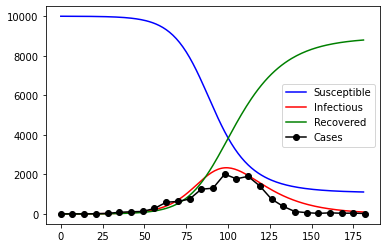

In [ ]:
#plot results
fig,ax = plt.subplots()
ax.plot(St, 'b', label='Susceptible')
ax.plot(It, 'r', label='Infectious')
ax.plot(Rt, 'g', label='Recovered')
ax.plot(7*np.arange(0,len(positive_tests)), positive_tests, 'k', marker ='o',  label='Cases')
ax.legend();

# **Lotka-Volterra (ecology)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **MIsinformation model (social media)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#parameters
N = 10000 #population
M0 = 1 #patient zero
I0 = N - M0 #informed accounts
It0 = 1000 #no informed tweets
Mt0 = 1 #no misinformed tweets
n = 50 #tweets read per day
alpha = 0.01 #I to M conversion probability
beta = 0.02 #M to I conversion
rhoI = 5 #informed tweets written
rhoM = 5 #misinformed tweets written
omegaI = 0.005 #correction probability
omegaM = 0.005 #distortion probability
rI = 0.05 #retweet of informed
rM = 0.07 #retweet of misinformed
delta = 0.5 #probability of death


In [ ]:
#discrete steps
res = [] #list of results
I = I0; M = M0; Mt = Mt0; It = It0; #set initial conditions
for t in range(182):
  delta_I = M*n*(It/(Mt+It))*alpha #expected number of new misinformed
  delta_M = I*n*(Mt/(Mt+It))*beta #expected number of new corrections
  I += delta_I - delta_M #I(t+1)
  M += delta_M - delta_I #M(t+1)
  delta_It = I*rhoI + I*n*(Mt/(Mt+It))*omegaI + I*n*(It/(It+Mt))*rI - It*delta
  delta_Mt = M*rhoM + M*n*(It/(Mt+It))*omegaM + M*n*(Mt/(It+Mt))*rM - Mt*delta
  It += delta_It #It(t+1)
  Mt += delta_Mt #Mt(t+1)
  res.append((I,M,It,Mt))

#zip unpacked list of tuples (n-th elements all together)
#map them to arrays
Id,Md,Itd,Mtd = map(np.array, zip(*res))

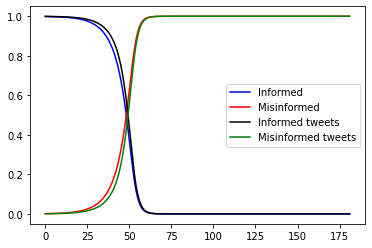

In [ ]:
#plot results
fig,ax = plt.subplots()
ax.plot(Id/N, 'b', label='Informed')
ax.plot(Md/N, 'r', label='Misinformed')
ax.plot(Itd/(Itd+Mtd), 'k', label='Informed tweets')
ax.plot(Mtd/(Itd+Mtd), 'g', label='Misinformed tweets')
ax.legend();